### Two Question

1. What is the difference between logistic regression and Support Vector Machine?

2. Can I use any function as a kernel in Support Vector Machine?

# 🌸 SVM Classifier on Iris Dataset
This notebook demonstrates how to train and visualize different SVM classifiers using the Iris dataset with only two features (sepal length and width).

In [ ]:
# Step 1: Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from matplotlib.lines import Line2D


In [ ]:
# Step 2: Load Iris dataset (only two features for visualization)
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use sepal length and width
y = iris.target

# Step 3: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(iris.feature_names)  # Display feature names for reference


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### Sepal, Petal of Flower
<img width="350" src="https://upload.wikimedia.org/wikipedia/commons/7/78/Petal-sepal.jpg">

In [ ]:
# Step 4: Define multiple SVM models
models = [
    ("SVC with linear kernel", SVC(kernel="linear", C=1)),
    ("LinearSVC (linear kernel)", LinearSVC(C=1, max_iter=10000)),
    ("SVC with RBF kernel", SVC(kernel="rbf", gamma=0.7, C=1)),
    ("SVC with polynomial (degree 3) kernel", SVC(kernel="poly", degree=3, C=1))
]


In [ ]:
# Step 5: Function to plot decision boundaries with legends
def plot_decision_boundary_with_legend(model, X, y, ax, title, target_names):
    model.fit(X, y)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    ax.set_xlabel("Sepal length (cm)")
    ax.set_ylabel("Sepal width (cm)")
    ax.set_title(title)
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label=target_names[i],
               markerfacecolor=plt.cm.coolwarm(i / 2), markersize=8, markeredgecolor='k')
        for i in range(3)
    ]
    ax.legend(handles=legend_elements, title="Iris Classes", loc="upper left")


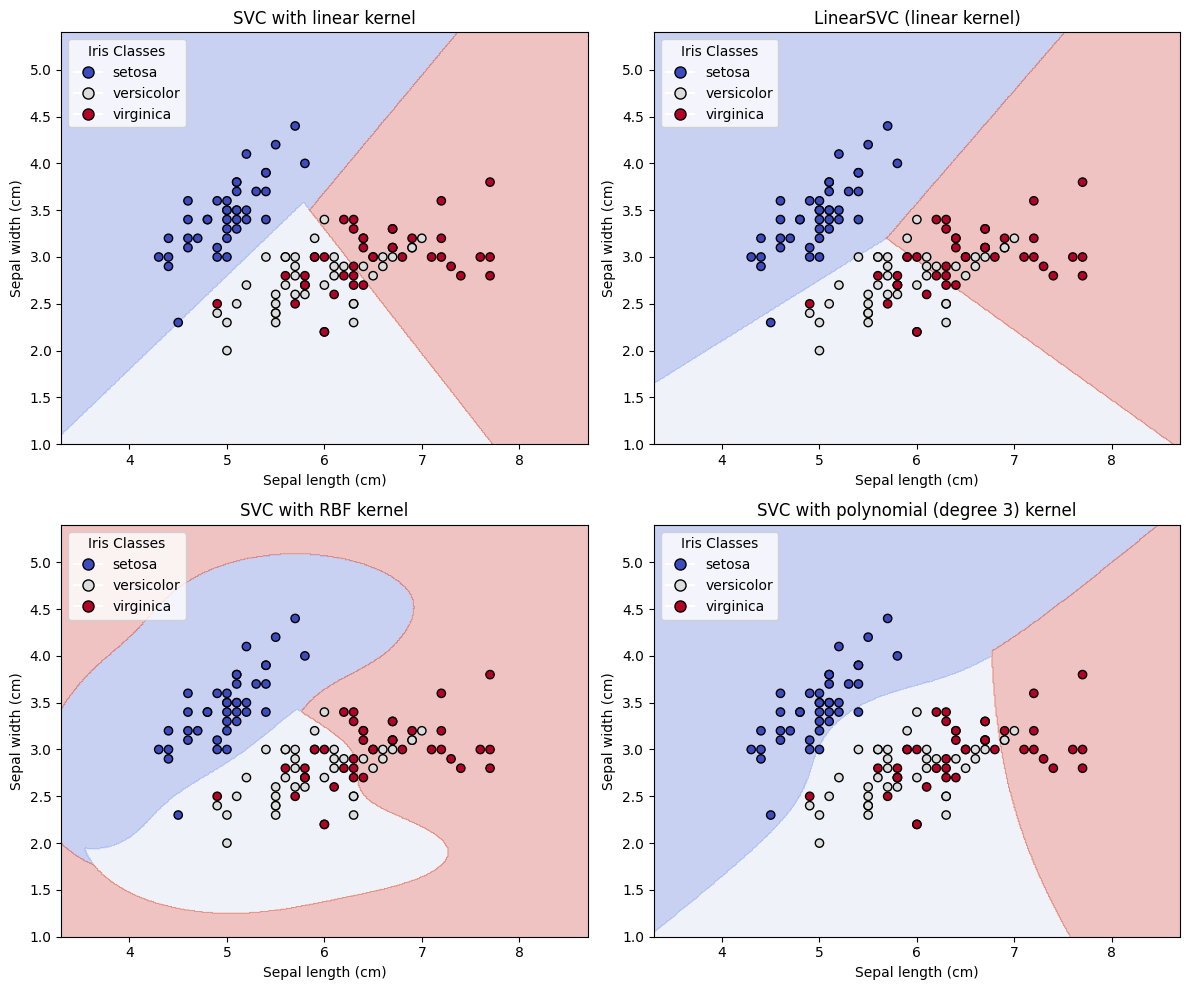

In [ ]:
# Step 6: Plot all models with legends
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
target_names = iris.target_names

for (title, model), ax in zip(models, axes.ravel()):
    clf = make_pipeline(StandardScaler(), model)
    plot_decision_boundary_with_legend(clf, X_train, y_train, ax, title, target_names)

plt.tight_layout()
plt.show()


In [ ]:
# Step 7: Evaluate accuracy on test set
for title, model in models:
    clf = make_pipeline(StandardScaler(), model)
    clf.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    print(f"{title}: Test Accuracy = {acc * 100:.2f}%")


SVC with linear kernel: Test Accuracy = 90.00%
LinearSVC (linear kernel): Test Accuracy = 93.33%
SVC with RBF kernel: Test Accuracy = 90.00%
SVC with polynomial (degree 3) kernel: Test Accuracy = 66.67%
